In [1]:
# Libraries that this notebook will use:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from datascience import *
from matplotlib.colors import ListedColormap
import re
# Helps the maps display nicely in the notebook:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 20]
# Tells the notebook not to display warnings:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import IFrame

# HOLC areas
**We have data for these areas in California: Fresno, Los Angeles, San Francisco, San Jose, Stockton, San Diego, Oakland.**

In [2]:
from matplotlib.colors import ListedColormap

# Create a ListedColormap object called holc_cmap, pass in the list of colors
holc_cmap = ListedColormap(['green', 'blue', 'yellow', 'red'], name='holc_colors')

# Los Angeles

In [8]:
la_import = gpd.read_file('holc_la')
census2000 = gpd.read_file("census2000")

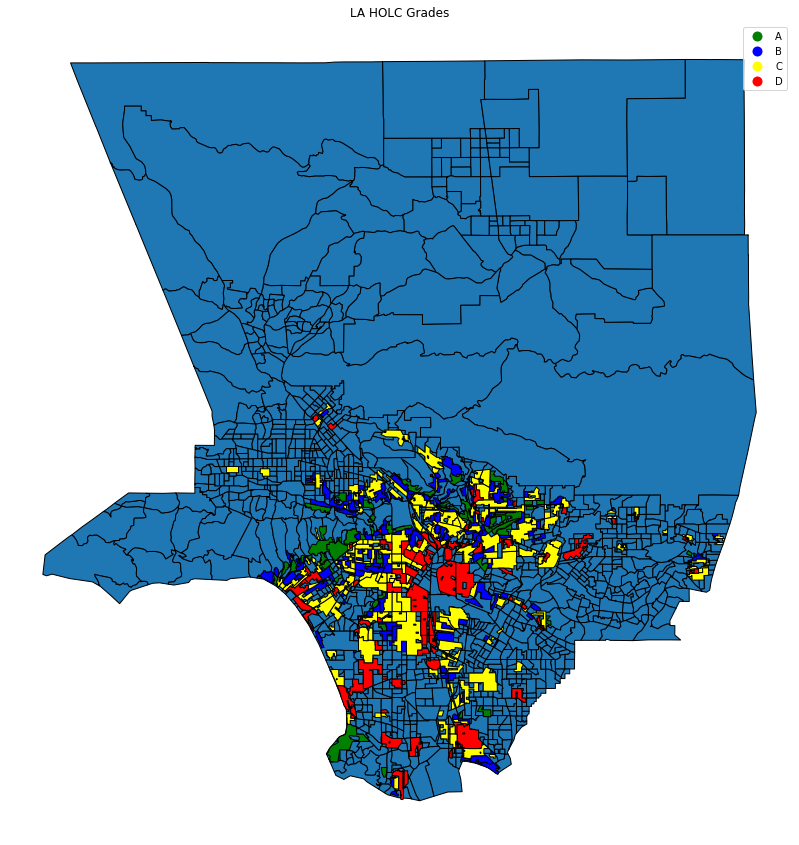

In [9]:
la_county = census2000[census2000['COUNTY']=='037']

geometries_str = la_county['geometry'].apply(lambda x: x.wkt).values
n = la_county[['33.4' not in i for i in geometries_str]]

geometries_str2 = n['geometry'].apply(lambda x: x.wkt).values
n2 = n[['33.3' not in i for i in geometries_str2]]

geometries_str3 = n2['geometry'].apply(lambda x: x.wkt).values
n3 = n2[['32.9' not in i for i in geometries_str3]]


base = n3.plot(figsize=(15, 15))
holc_cmap = ListedColormap(['green', 'blue', 'yellow', 'red'], name='holc_colors')
la_import.plot(ax= base, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('LA HOLC Grades')
plt.axis('off');

# Tree Canopy

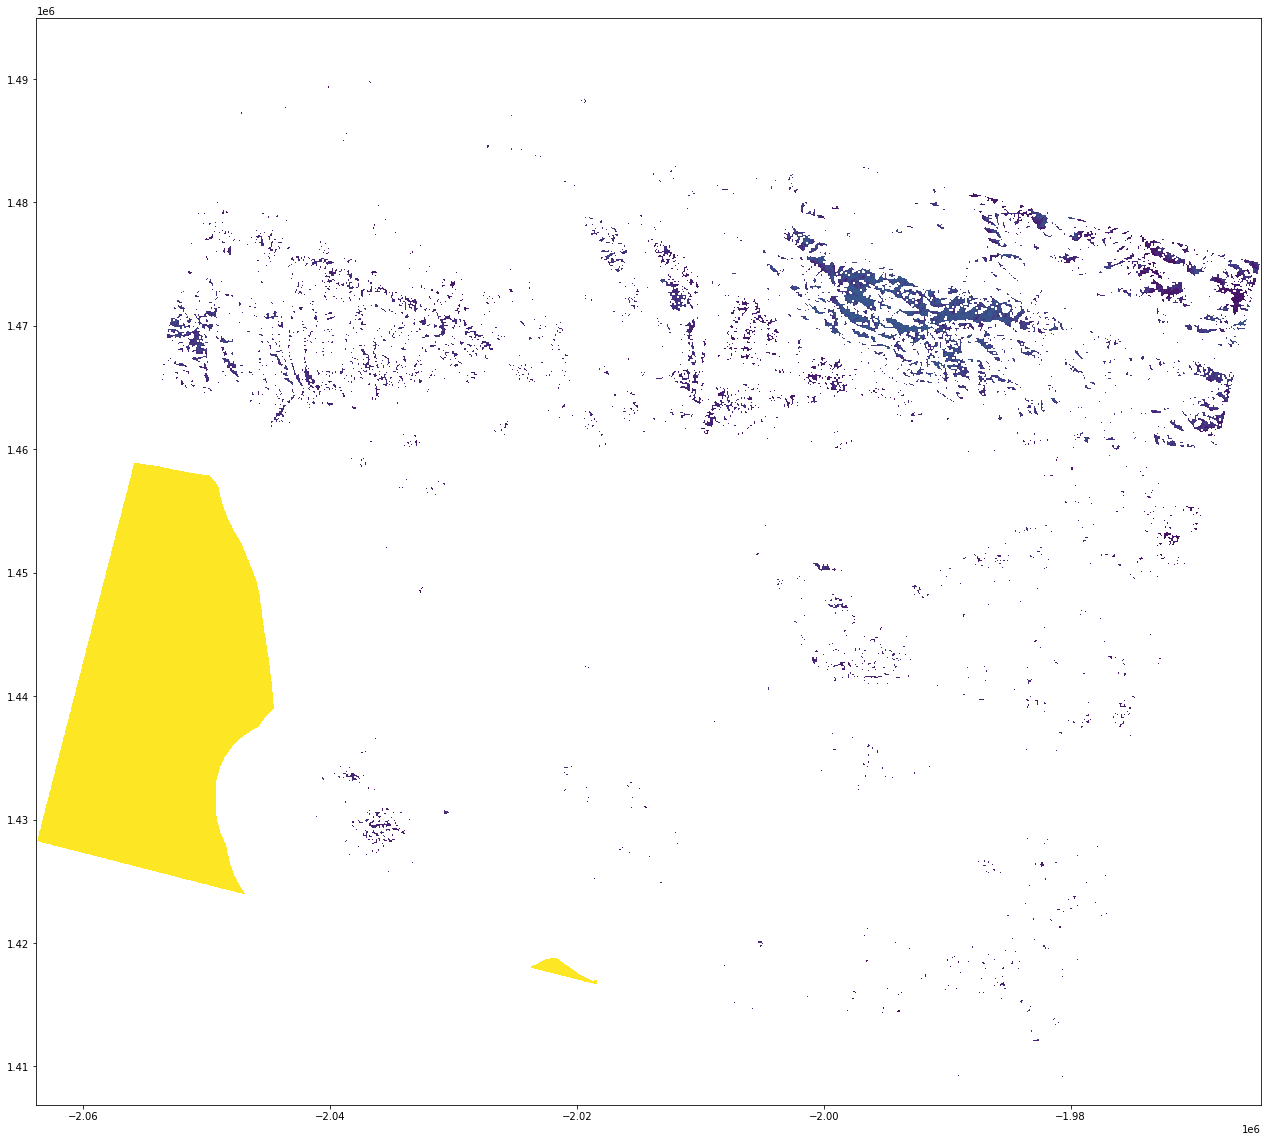

In [3]:
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
import os

# File path
data_dir = "CA_trees2016"
dem_fp = os.path.join(data_dir, "2016_tree_canopy_LA.tif")

# Read the Digital Elevation Model for Helsinki
dem = rasterio.open(dem_fp)
show(dem);

In [8]:
holc_tree_cover = pd.read_csv('HOLC_mean_tree_cover2016.csv')
holc_tree_cover.head()

,name,holc_id,holc_grade,area_descr,area,_count,_sum,_mean
0,NaN,A,A,"{ """" : """" }",Oakland,7737.0,176517.0,22.814657
1,NaN,A1,A,"{ ""1"" : ""Berkeley Green A-1"", ""10a"" : ""fair"", ...",Berkeley,2130.0,17375.0,8.157277
2,NaN,A10,A,"{ ""1"" : ""Oakland, California Low Green A-10"", ...",Oakland,194.0,622.0,3.206186
3,NaN,A11,A,"{ ""1"" : ""Oakland, California Green A-11"", ""10a...",Oakland,345.0,3700.0,10.724638
4,NaN,A2,A,"{ ""1"" : ""Berkeley, California Green A-2"", ""10a...",Berkeley,746.0,7629.0,10.226542


In [10]:
holc_tree_cover.groupby('area').size()

area
Alameda           13
Albany             4
Berkeley          19
Emeryville         2
Fresno            25
Los Angeles      416
Oakand             1
Oakland           69
Piedmont           4
San                7
San Diego         76
San Francisco     97
San Jose          37
Stockton          43
dtype: int64

In [12]:
holc_ca_geom = gpd.read_file('CA_trees2016/holc_ca_tree')
holc_ca_geom.head()

,name,holc_id,holc_grade,area_descr,area,geometry
0,None,A,A,"{ """" : """" }",Oakland,"POLYGON ((-2256129.514 1954655.076, -2256108.7..."
1,None,A1,A,"{ ""1"" : ""Berkeley Green A-1"", ""10a"" : ""fair"", ...",Berkeley,"POLYGON ((-2258485.837 1965737.749, -2258407.4..."
2,None,A10,A,"{ ""1"" : ""Oakland, California Low Green A-10"", ...",Oakland,"POLYGON ((-2258903.873 1954942.364, -2258949.8..."
3,None,A11,A,"{ ""1"" : ""Oakland, California Green A-11"", ""10a...",Oakland,"POLYGON ((-2256129.514 1954655.076, -2256191.2..."
4,None,A2,A,"{ ""1"" : ""Berkeley, California Green A-2"", ""10a...",Berkeley,"POLYGON ((-2259866.714 1965745.875, -2259877.5..."


<AxesSubplot:>

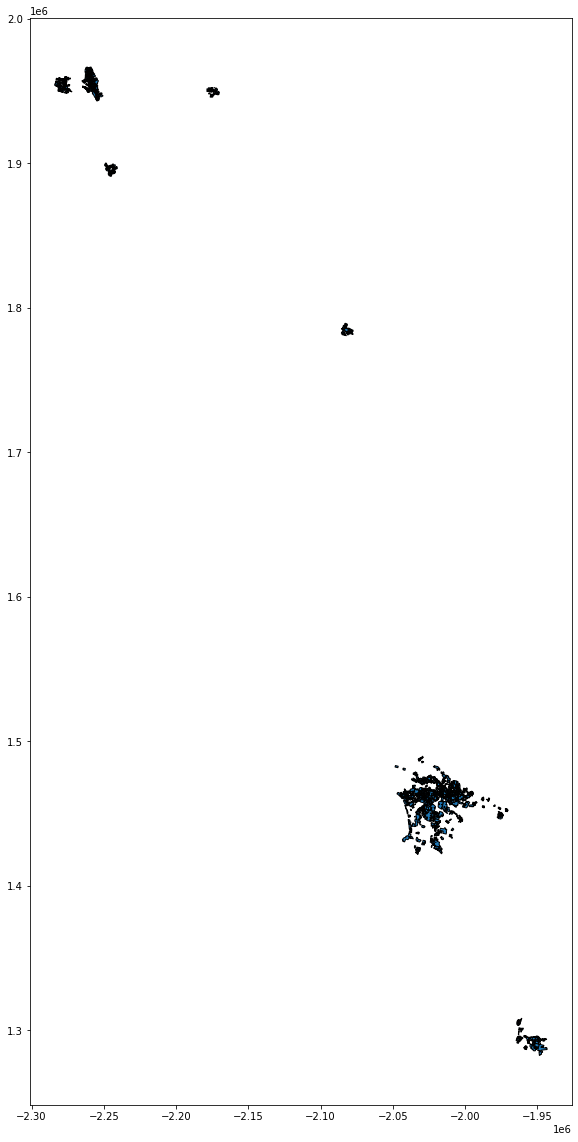

In [13]:
holc_ca_geom